In [1]:
# Setting up the environment.
import numpy as np
import pandas as pd

In [2]:
# Load the data from the John Hopkins github repo
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-22-2020.csv', index_col=0)

In [3]:
# Dropping some columns and sorting

df1 = df[["Admin2", "Province_State", "Country_Region", "Confirmed", "Deaths", "Combined_Key", "Recovered", "Active"]] #getting the columns I want
df1 = df1[df1['Confirmed'] !=0] #dropping States with 0 confirmed
df1 = df1[(df1["Country_Region"] == "US")] #dropping countries other than the US
df1 = df1.sort_values(by=['Province_State','Confirmed'], ascending=True) #sorting by State and then Confirmed
df1 = df1.dropna() #dropping NA values
df1 = df1[df1.Province_State != 'Wuhan Evacuee'] #dropping this row because it is not US
df1['Combined_Key'] = df1['Combined_Key'].str.replace(r', US', '') #removing US from Combined key so it looks better in the hover text
#df1 = df1.groupby(['Province_State'])
df1 = df1.reset_index() #resetting index so FIPS is not the index
df1 = df1.rename(columns={'Province_State': 'State'})
df1 = df1.rename(columns={'Admin2': 'County'})
df1 = df1.rename(columns={'Country_Region': 'Country'})
df1 = df1.rename(columns={'Combined_Key': 'County/State'})
df1.head(5)
#df1.shape

,FIPS,County,State,Country,Confirmed,Deaths,County/State,Recovered,Active
0,1057.0,Fayette,Alabama,US,4,0,"Fayette, Alabama",0,4
1,1061.0,Geneva,Alabama,US,5,0,"Geneva, Alabama",0,5
2,1041.0,Crenshaw,Alabama,US,6,0,"Crenshaw, Alabama",0,6
3,1075.0,Lamar,Alabama,US,8,0,"Lamar, Alabama",0,8
4,1035.0,Conecuh,Alabama,US,9,0,"Conecuh, Alabama",0,9


In [4]:
df2 = df1.groupby(['State']).sum()
df2 = df2.rename(columns={'Confirmed': 'Total Confirmed'})
df2 = df2.rename(columns={'Deaths': 'Total Deaths'})
df2 = df2.reset_index()
#df2 = df2[df['Confirmed'] > 20]
df2 = df2.sort_values(by=['Total Confirmed', 'State'], ascending=False)
df2.head(5)

,State,FIPS,Total Confirmed,Total Deaths,Recovered,Active
32,New York,2091626.0,263292,19413,0,243879
30,New Jersey,804475.0,95914,5150,0,90764
21,Massachusetts,390195.0,42944,2182,0,40762
4,California,321041.0,37344,1419,0,35925
38,Pennsylvania,2818489.0,36082,1673,0,34409


In [5]:
frames = [df1, df2]
#df3 = pd.concat([df1, df2], axis=0, sort=False)
df3 = pd.concat(frames)
df3.head(5)

,FIPS,County,State,Country,Confirmed,Deaths,County/State,Recovered,Active,Total Confirmed,Total Deaths
0,1057.0,Fayette,Alabama,US,4.0,0.0,"Fayette, Alabama",0,4,NaN,NaN
1,1061.0,Geneva,Alabama,US,5.0,0.0,"Geneva, Alabama",0,5,NaN,NaN
2,1041.0,Crenshaw,Alabama,US,6.0,0.0,"Crenshaw, Alabama",0,6,NaN,NaN
3,1075.0,Lamar,Alabama,US,8.0,0.0,"Lamar, Alabama",0,8,NaN,NaN
4,1035.0,Conecuh,Alabama,US,9.0,0.0,"Conecuh, Alabama",0,9,NaN,NaN


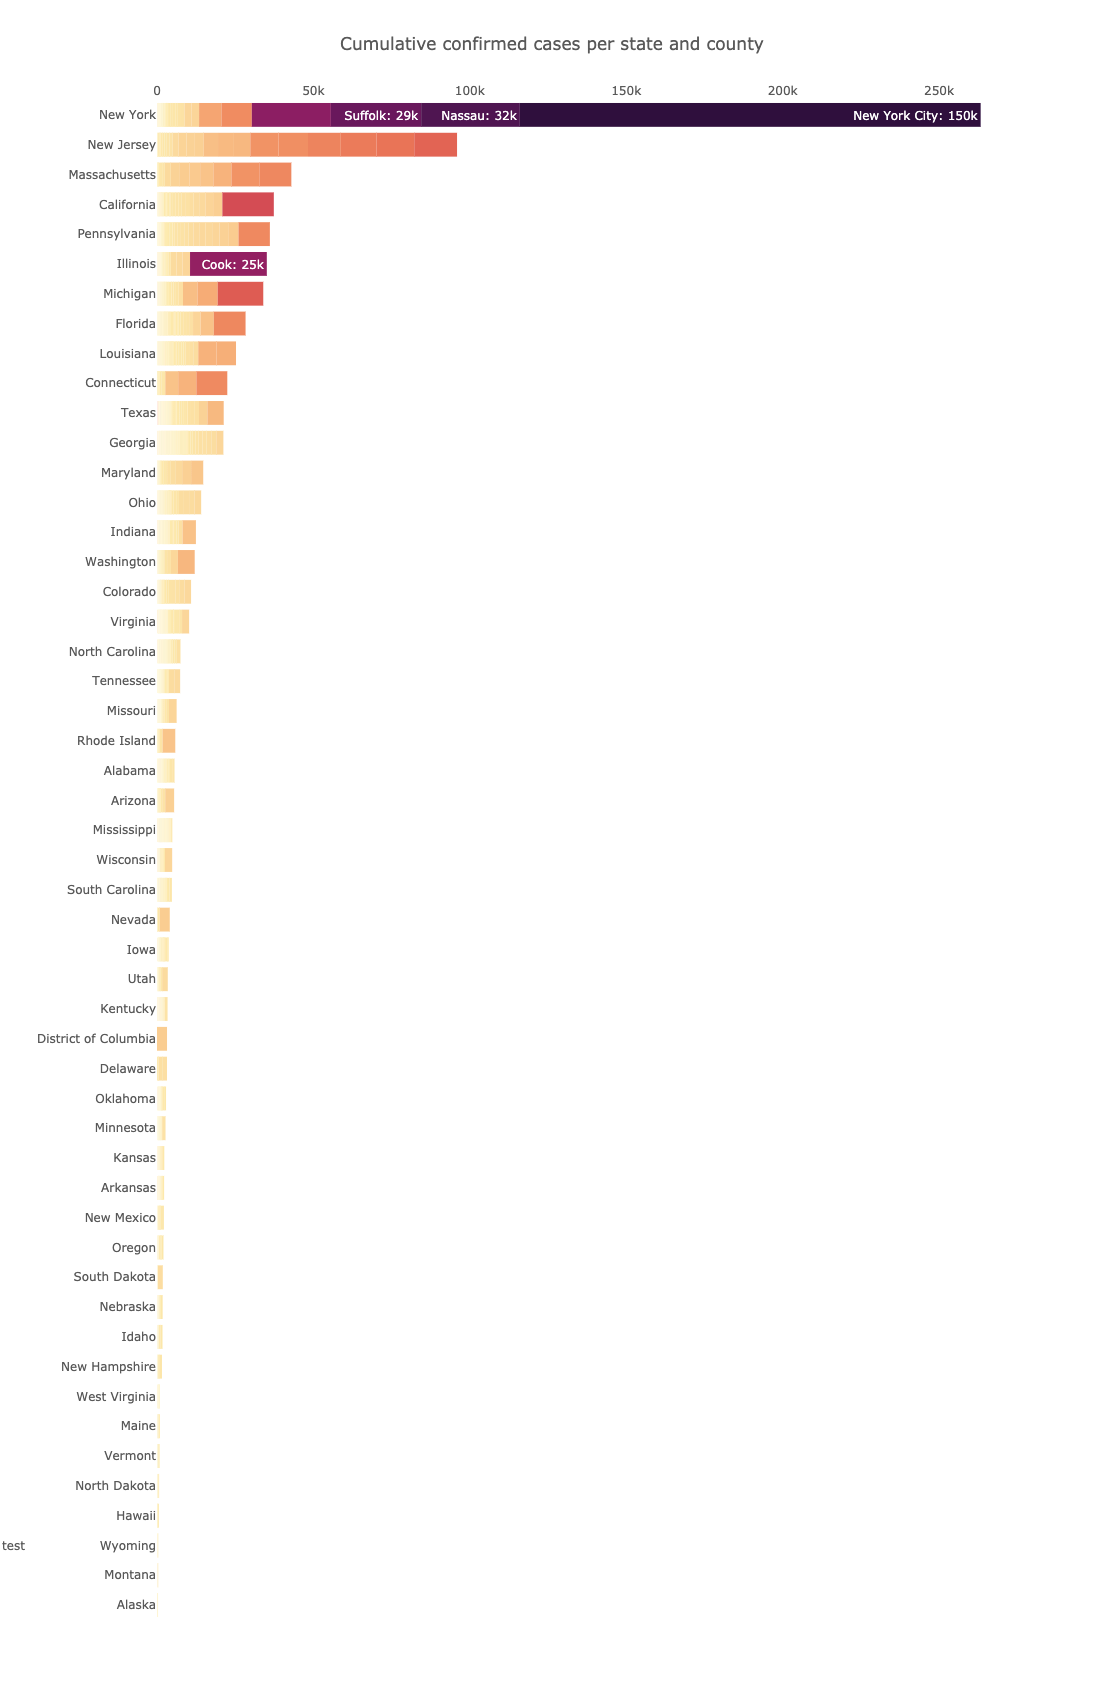

In [7]:
import plotly.graph_objects as go

fig = go.Figure()

# fig.add_trace(go.Bar(
#                  x=df3['Total Confirmed'],
#                  y=df3['State']
#                  ))

fig.add_trace(go.Bar(
                 x=df1['Confirmed'],
                 y=df1['State'],
                 customdata=df1[['County', 'Deaths']],
                 text=df1['Confirmed'],
                 marker=dict(
                            color=df1['Confirmed'],
                            line=dict(color='white', width=0),
                            colorscale='matter',
                            cmin=0,
                            cmid=15000,
                            cmax=35000
                            ),
                 orientation='h',
                 hovertemplate='<b>%{customdata[0]}</b> <br><b>Confirmed: %{value:,.2s}</b><br><br>Deaths: %{customdata[1]:,.2s}<extra></extra>'
                ))
    
annotations = []
    
for i in range(0, len(df1['State'])):
      anno = dict(
          x = df3['Total Confirmed'],
          y = df1['State'].iloc[i],
          xref='x',
          yref='y',
          text='test',
          #text= np.array2string(df1['Confirmed'].iloc[i],
          showarrow=True,
          arrowhead=1,
          ax=0,
          ay=0
      )
annotations.append(anno)
    
fig.update_layout(
        title='Cumulative confirmed cases per state and county',
        title_x=0.5,
        annotations = annotations,
        paper_bgcolor='rgba(0,0,0,0)', 
        plot_bgcolor='rgba(0,0,0,0)',
        barmode='stack',
        height=1700,
        showlegend=False,
        xaxis=dict(categoryorder="category ascending", fixedrange=True),
        yaxis=dict(autorange="reversed", title="", categoryorder="total descending", fixedrange=True),
        dragmode=False,
        font=dict(
            #family=\"Times New Roman\",
            #size=16,
            color="#595959"),
        hoverlabel=dict(
                    bgcolor="white",
                    font_size=16,
                    font_color="#595959",
                    font_family="Arial",
                    bordercolor='#595959'
                    ),
        uniformtext_minsize=10, uniformtext_mode='hide',
    )
    
fig.update_xaxes(showline=True, linewidth=0.2, side='top')
fig.update_traces(texttemplate='%{customdata[0]}: %{text:.2s}', textposition='inside')
   
fig.show()

import plotly.io as pio
pio.write_html(fig, file='Index.html', auto_open=True)